In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import pickle
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from Preprocessing.to_embedding import WordEmbedding
from data_format_phase3 import formatting
from Preprocessing.helper_functions import import_embedding, embedding_matrix_word2vec
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
#data = formatting("../phase1_movie_reviews-train.csv")

In [138]:
file_path = open("fomatted_data",'rb')
data = pickle.load(file_path)

In [139]:
data = data.drop("year", axis=1)


In [140]:
data

,polarity,summary,reviewText,bad,funny,new,old,worth,long,worst,...,good,interesting,set,quality,special,great,better,best,like,affin_score
0,negative,"[bruce, lee, the, legend, baaaaaad]","[horrible, movie, thats, say, first, tells, lee, shows, four, chinese, movies, kid, rest, movie, bruce, lee, imitator, unrelated, bruce, extremely, cheap, avoid, thing, bruce, lee, legend]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.153846
1,positive,"[stylish, yet, uneven, film, at, an, affordable, price]","[lover, genres, italian, horror, merely, average, film, way, uneven, starts, bang, heinous, murder, loses, focus, horror, scenes, far, apart, untill, end, hospital, zombie, attack, end, makes, sen...",1,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0.084337
2,positive,"[masterful, and, commanding]","[master, commander, far, side, world, latest, attempt, hollywood, establishment, revive, adventure, genre, enjoyed, great, popularity, hollywood's, golden, age, based, patrick, phenomenally, succe...",0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0.179310
3,positive,"[great, special, effects, disappointed, with, the, ending, though]","[what's, movie, i'm, avid, fan, sch, fi, horror, movies, tv, shows, caught, wind, movie, long, ago, wanted, see, since, seen, time, happened, watch, last, night, since, huge, collection, fi, movie...",0,0,0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,-0.066667
4,positive,"[bevare, bevare, dracula, is, suspect, here]","[bought, set, went, local, retailer, stack, picked, one, box, heard, loose, discs, around, second, box, tried, make, sound, figured, discs, holders, that's, one, bought, far, problems, i'm, afraid...",0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,-0.189189
5,positive,"[wishy, washy, beginning, fantastic, end, dawsons, creek, season, 4]","[excited, pop, season, 4, dvd, finished, season, 3, first, episodes, good, got, really, boring, ok, say, least, stopped, watching, nearly, 2, months, put, dvd, disc, 2, last, finished, show, reall...",0,0,1,0,0,0,0,...,1,0,1,0,0,1,1,1,1,0.158228
6,positive,"[a, delicious, film, that, defies, classification]","['the, defies, classification, western, though, turns, western, channel, occasionally, best, period, southern, gothic, melodrama, filled, many, treasures, surprises, one, major, among, assets, stu...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.144105
7,negative,"[the, old, grey, gere, ain't, what, he, used, to, be]","[saw, richard, gere, days, first, comeback, late, 1980s, 1990s, movies, like, pretty, woman, julia, roberts, internal, affairs, andy, garcia, know, good, grey, haired, older, man, whether, romanti...",1,0,0,1,0,0,0,...,1,1,0,0,0,0,1,0,1,0.078788
8,negative,"[unsatisfying, sequel]","[unsatisfying, sequel, wonderful, quot, heroic, trio, quot, movie, dark, quite, frankly, depressing, three, likable, major, characters, die, horribly, defeat, darkness, seem, major, themes, also, ...",0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0.012346
9,positive,"[what, a, wonderful, day, for, an, exorcism]","[movies, made, go, achieve, epic, like, status, become, permanently, ingrained, people's, psyches, one, films, author, william, peter, blatty, wrote, novel, inspired, story, attending, college, st...",0,0,0,1,0,1,1,...,1,0,0,0,0,0,0,1,1,0.027875


In [141]:
#data = data[:round(len(data)*.2)]
y = pd.get_dummies(data['polarity'])
X_train, X_dev, y_train, y_dev = train_test_split(data, y, test_size = 0.20, random_state=42)

X_train_nlp, X_dev_nlp = X_train['reviewText'], X_dev['reviewText']
X_train_meta, X_dev_meta = X_train.iloc[:,3:], X_dev.iloc[:,3:]
embedding_size = 300 #number of feature weights in embeddings
max_len = 400

In [142]:
X_train_meta

,bad,funny,new,old,worth,long,worst,big,real,little,...,good,interesting,set,quality,special,great,better,best,like,affin_score
51004,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0.089820
11453,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.068182
9691,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0.350000
51992,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.642857
23531,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0.129032
30635,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0.058824
69598,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0.046512
49946,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0.785714
60349,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.461538
81959,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0.131579


In [8]:
# embedding = WordEmbedding(num_features = embedding_size)

# WordEmbedding.fit(embedding, X_train_nlp)
# WordEmbedding.size(embedding)

In [9]:
#Save word embedding to dataframe
#train_embeddings = WordEmbedding.to_pd(embedding, X_train)

#Save Save embeddings to file
# WordEmbedding.to_file(embedding)

In [10]:
import numpy as np
def loadGloveModel(gloveFile):
    print("Loading Glove Model")
    f = open(gloveFile,'r')
    model = {}
    for line in f:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print("Done.",len(model)," words loaded!")
    return model


In [11]:
embeddings_index = loadGloveModel('glove.42B.300d.txt')

Loading Glove Model
Done. 1917494  words loaded!


## 2. Vectorize text data

In [143]:
#Basic Vectorization of data
#Review data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_nlp)
word_index = tokenizer.word_index

def vectorize(data, tokenizer ,max_len):
    sequences = tokenizer.texts_to_sequences(data)
    padding = pad_sequences(sequences, maxlen = max_len)
    
    return padding

X_train_nlp = vectorize(X_train_nlp, tokenizer , max_len)
X_dev_nlp = vectorize(X_dev_nlp, tokenizer, max_len)

print('Found %s unique tokens.' % len(word_index))
print('Shape of train tensor', X_train_nlp.shape)
print('Shape of dev tensor', X_dev_nlp.shape)

Found 38806 unique tokens.
Shape of train tensor (72000, 400)
Shape of dev tensor (18000, 400)


## 3. Create word vectors with the loaded word2vec model

In [144]:
embedding_matrix, num_words = embedding_matrix_word2vec(word_index, embedding_size, embeddings_index)

### Check train/dev sets

In [145]:
print('Shape of X_train:', X_train_nlp.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_dev_nlp.shape)
print('Shape of y_test:', y_dev.shape)

Shape of X_train: (72000, 400)
Shape of y_train: (72000, 2)
Shape of X_test: (18000, 400)
Shape of y_test: (18000, 2)


## 5. Define model

In [146]:
print(tf.__version__)

1.9.0


In [147]:
import keras

config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 8} ) 
config.gpu_options.allow_growth = True
sess = tf.Session(config=config) 
keras.backend.set_session(sess)



In [148]:
# sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# keras.backend.set_session(sess)

In [149]:

keras.backend.tensorflow_backend._get_available_gpus()
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13534543845423348083
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7722257613
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9778986787428733281
physical_device_desc: "device: 0, name: GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [150]:
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, LSTM, GRU, Bidirectional, GlobalMaxPool1D, Dropout, Input, concatenate, CuDNNGRU
from keras.layers.embeddings import Embedding
from keras.initializers import Constant
from keras import regularizers

# Define Model
# model = Sequential()
# model.add(Embedding(num_words, 
#                     embedding_size,
#                     input_length = max_len,
#                      dropout=0.2))
# model.add(Bidirectional(LSTM(128, return_sequences = True)))
# model.add(GlobalMaxPool1D())
# model.add(Dense(20, activation="relu"))
# model.add(Dropout(0.05))
# model.add(Dense(2, activation="sigmoid"))


nlp_input = Input(shape=(max_len,), 
                  name='nlp_input')
meta_input = Input(shape=(len(X_train_meta.columns),), 
                   name='meta_input')
emb = Embedding(output_dim=embedding_size, 
                input_dim=num_words, 
                input_length=max_len)(nlp_input)
nlp_out = Bidirectional(LSTM(128, 
                                 kernel_regularizer=regularizers.l2(0.005)))(emb)
x = concatenate([nlp_out, 
                 meta_input])
drop = Dropout(0.05)(x)
x = Dense(20, 
          activation='relu')(drop)
drop = Dropout(0.05)(x)
x = Dense(2, 
          activation='sigmoid')(drop)
model = Model(inputs=[nlp_input , 
                      meta_input], 
              outputs=[x])
print(model.summary())
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
nlp_input (InputLayer)          (None, 400)          0                                            
__________________________________________________________________________________________________
embedding_13 (Embedding)        (None, 400, 300)     11642100    nlp_input[0][0]                  
__________________________________________________________________________________________________
bidirectional_13 (Bidirectional (None, 256)          439296      embedding_13[0][0]               
__________________________________________________________________________________________________
meta_input (InputLayer)         (None, 24)           0                                            
__________________________________________________________________________________________________
concatenat

In [151]:
X_sets = [X_train_nlp, X_train_meta]
dev_sets = [X_dev_nlp, X_dev_meta]
history = model.fit(X_sets, 
                    y_train, 
                    batch_size=128, 
                    validation_data =(dev_sets, y_dev), 
                    epochs=2)

Train on 72000 samples, validate on 18000 samples
Epoch 1/2
72000/72000 [==============================] - 459s 6ms/step - loss: 0.5178 - acc: 0.8511 - val_loss: 0.2719 - val_acc: 0.8934
Epoch 2/2
72000/72000 [==============================] - 452s 6ms/step - loss: 0.2173 - acc: 0.9211 - val_loss: 0.2888 - val_acc: 0.8911


In [152]:
model.save('funct_LSTM_model.h5')

In [ ]:
model.evaluate(X_sets, y_train, batch_size)

In [ ]:
from keras.models import load_model

# Deletes the existing model
#del model  

# Returns a compiled model identical to the previous one
model = load_model('my_model.h5')

In [153]:
game_df = pd.read_csv("../phase1_video_games-test-hidden.csv")
game_labels = pd.read_csv("../true_labels/true_game_labels.txt", header=None)



In [154]:
merged = pd.concat([game_df, game_labels], axis=1).drop('polarity', axis=1).rename(columns={0: "polarity"})

In [155]:
# get a list of columns
cols = list(merged)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('polarity')))
cols

# use ix to reorder
merged = merged.ix[:, cols]


/home/dsproj028/.conda/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [156]:
merged.to_csv('merged_df.csv', index=False)

In [157]:
from data_format_phase3 import formatting
game_data = formatting("merged_df.csv", test=True)


Adding topic features
Test registered, writing topics to dataframe
Opening topic file
Adding test topics
['bad', 'funny', 'new', 'old', 'worth', 'long', 'worst', 'big', 'real', 'little', 'original', 'boring', 'excellent', 'acting', 'good', 'interesting', 'set', 'quality', 'special', 'great', 'better', 'best', 'like']


In [158]:
game_data = game_data.drop('year', axis=1)
game_y = pd.get_dummies(game_data['polarity'])
game_train_meta = game_data.iloc[:,3:]
game_train_nlp = game_data['reviewText']



In [159]:
print(X_train_meta.columns)
print(game_data.columns)

Index(['bad', 'funny', 'new', 'old', 'worth', 'long', 'worst', 'big', 'real',
       'little', 'original', 'boring', 'excellent', 'acting', 'good',
       'interesting', 'set', 'quality', 'special', 'great', 'better', 'best',
       'like', 'affin_score'],
      dtype='object')
Index(['polarity', 'summary', 'reviewText', 'bad', 'funny', 'new', 'old',
       'worth', 'long', 'worst', 'big', 'real', 'little', 'original', 'boring',
       'excellent', 'acting', 'good', 'interesting', 'set', 'quality',
       'special', 'great', 'better', 'best', 'like', 'affin_score'],
      dtype='object')


In [ ]:
game_train_nlp = vectorize(game_train_nlp, tokenizer , max_len)
game_sets = [game_train_nlp, game_train_meta]


In [ ]:
lol = model.predict(x=game_sets,batch_size=200, verbose=1)

10400/21142 [=============>................] - ETA: 14s

In [34]:
lol

array([[0.03397238, 0.96598655],
       [0.24314243, 0.73086554],
       [0.1313969 , 0.8699318 ],
       ...,
       [0.65759945, 0.3567463 ],
       [0.9912055 , 0.00936924],
       [0.9761579 , 0.02454534]], dtype=float32)

In [35]:
for i in lol:
    max_idx = np.argmax(i)
    if max_idx == 0:
        i[0] = 1
        i[1] = 0
    else:
        i[1] = 1
        i[0] = 0

In [36]:
lol

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(game_y, lol)

0.8578185602119005

In [38]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 3, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 3, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [72]:
game_y

,negative,positive
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


Development Accuracy:  0.8575


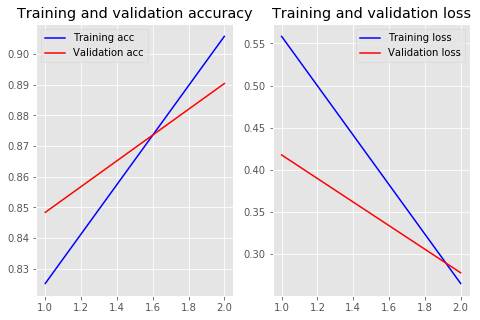

In [39]:
loss, accuracy = model.evaluate(game_sets, game_y, verbose=False)
print("Development Accuracy:  {:.4f}".format(accuracy))
#loss, accuracy = model.evaluate(dev_sets, y_dev, verbose=False)
#print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)